In [2]:
import pandas as pd
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
df = df.dropna()

In [7]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df[col]

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [8]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



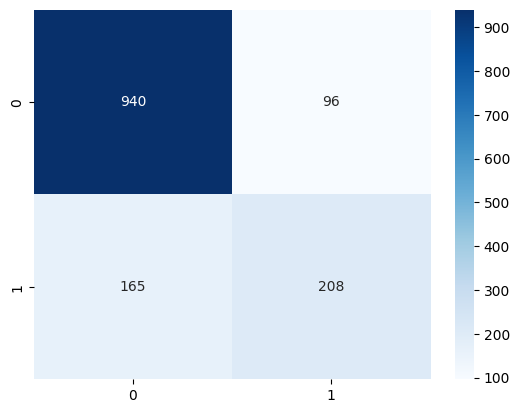

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


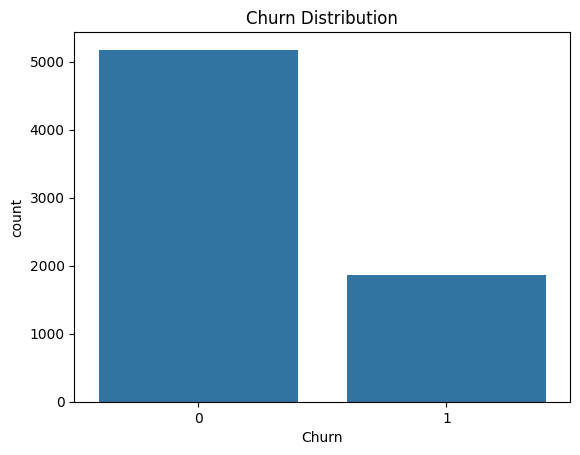

In [15]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


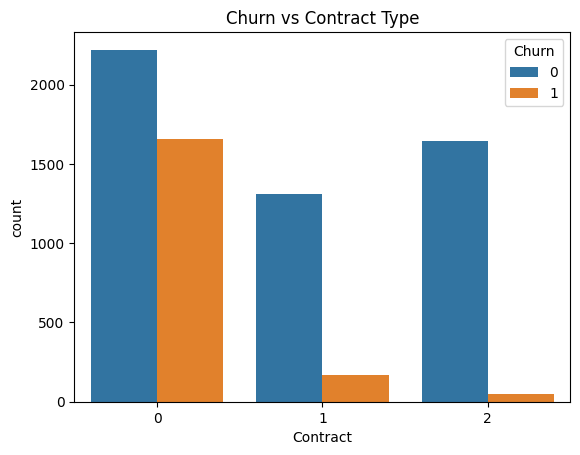

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn vs Contract Type")
plt.show()


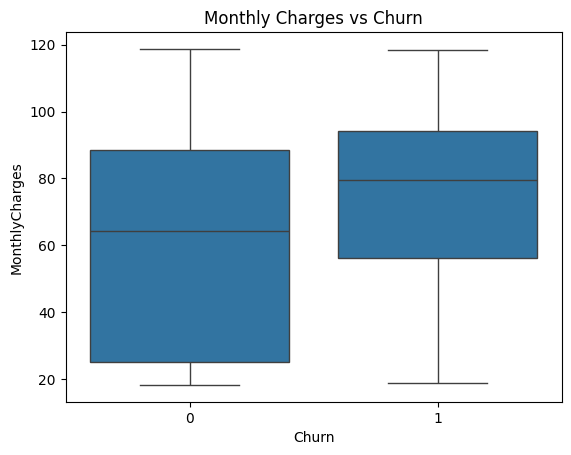

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [21]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))


             Feature  Importance
18    MonthlyCharges    0.800227
8    InternetService    0.188678
16  PaperlessBilling    0.169097
19      TotalCharges    0.111847
7      MultipleLines    0.081263
2      SeniorCitizen    0.067917
17     PaymentMethod    0.067286
14   StreamingMovies    0.039306
3            Partner    0.030884
13       StreamingTV   -0.003362


In [23]:
df.groupby('gender')['Churn'].sum()


,Churn
gender,
0,939
1,930


In [25]:
df.groupby('Churn')['tenure'].mean()


,tenure
Churn,
0,37.569965
1,17.979133


In [27]:
df.groupby('PaymentMethod')['Churn'].sum().sort_values(ascending=False)


,Churn
PaymentMethod,
2,1071
3,308
0,258
1,232


In [29]:
y_prob = model.predict_proba(X_test)[:,1]  # Probability of churn
high_risk = X_test[y_prob > 0.7]  # Customers with >70% chance of churn
print(high_risk.head())


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
185          692       0              0        1           0       1   
2715         325       1              0        0           0      41   
1807        4911       0              0        0           0       1   
132         6058       1              0        0           0      67   
1263        4839       0              1        1           0      68   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
185              0              1                0               0   
2715             1              2                2               1   
1807             1              0                1               0   
132              1              0                0               0   
1263             1              2                1               0   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
185              0                 0            0            0   
2715          

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


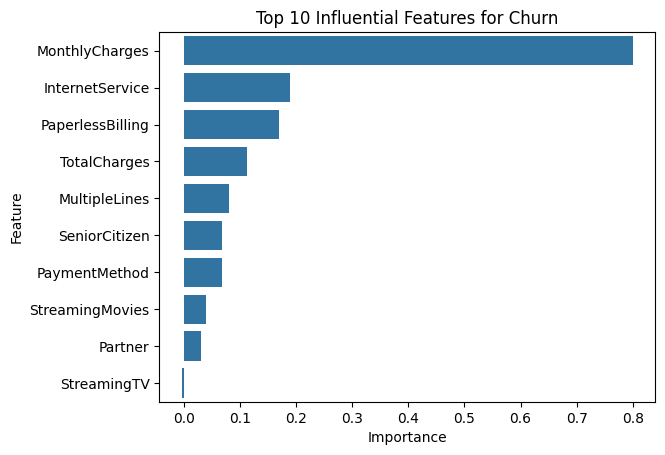

In [31]:
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title("Top 10 Influential Features for Churn")
plt.show()


In [33]:
df[(df['MonthlyCharges']>80) & (df['Churn']==1)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,2646,1
13,174,1,0,0,0,49,1,2,1,0,...,2,0,2,2,0,1,0,103.70,4265,1
26,4584,1,0,1,1,47,1,2,1,0,...,0,0,2,2,0,1,2,99.35,4019,1
38,3828,1,0,0,0,34,1,2,1,0,...,2,0,2,2,0,1,2,106.35,3074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,2508,0,0,0,0,8,1,2,1,0,...,0,0,2,2,0,0,0,95.65,5901,1
6993,4666,0,1,1,0,50,1,2,1,0,...,0,0,2,0,0,1,2,88.05,3708,1
7006,53,1,0,0,0,40,1,2,1,0,...,2,0,2,2,0,1,1,104.50,3450,1
7009,5473,1,0,0,0,23,1,2,1,0,...,2,0,0,0,0,1,2,81.00,1520,1


In [35]:
df.groupby(['Contract','Churn'])[['tenure','MonthlyCharges']].mean()


tenure  MonthlyCharges
Contract Churn                           
0        0      21.033333       61.462635
         1      14.016918       73.019396
1        0      41.674063       62.508148
         1      44.963855       85.050904
2        0      56.602914       60.012477
         1      61.270833       86.777083

In [36]:
df[(df['SeniorCitizen']==1) & (df['Churn']==1)].shape[0]


476